In [ ]:
# Importar librerías necesarias para manipulación de datos y archivos zip
import zipfile
import pandas as pd

#Preprocesado de los datos de entrenamiento

In [ ]:
# Importar librerías necesarias para manipulación de datos, visualización y preprocesamiento
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing as ps
from difflib import SequenceMatcher

In [ ]:
# Cargar los datos de entrenamiento desde el archivo CSV
# with zipfile.ZipFile("udea-ai4eng-20242.zip", 'r') as zip_ref:
    # zip_ref.extractall("data")

df = pd.read_csv("train.csv")
# Mostrar las primeras filas del DataFrame para inspeccionar los datos
df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [ ]:
# Crear una copia del DataFrame original para trabajar con ella
df2 = df.copy()

In [ ]:
# Imprimir los nombres de las columnas de ambos DataFrames para verificar que sean iguales
print(df2.columns)
print(df.columns)

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL',
       'coef_1', 'coef_2', 'coef_3', 'coef_4'],
      dtype='object')
Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL',
       'coef_1', 'coef_2', 'coef_3', 'coef_4'],
      dtype='object')


##Preparación de Datos Categóricos para Machine Learning
Para optimizar el rendimiento de los algoritmos de machine learning, es crucial transformar las variables categóricas en un formato numérico que estos puedan interpretar eficientemente. En nuestro conjunto de datos, hemos identificado varias columnas con valores categóricos que requieren este procesamiento.

A continuación, se detalla el proceso de encoding que se aplicará en el entorno de Google Colab:

A continuación se realiza entonces

In [ ]:
# Convertir la columna 'PERIODO' a tipo flotante
df2['PERIODO'] = df2['PERIODO'].astype(float)
# Aplicar One-Hot Encoding a las columnas categóricas especificadas
columns_to_expand = ['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',"FAMI_EDUCACIONPADRE","FAMI_EDUCACIONMADRE","FAMI_ESTRATOVIVIENDA"]
df2 = pd.get_dummies(df2, columns=columns_to_expand)
# Eliminar la columna 'ID' ya que no es útil para el modelado
df2 = df2.drop(['ID',], axis=1)
# Mostrar el DataFrame resultante después del One-Hot Encoding
df2

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,...,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,FAMI_ESTRATOVIVIENDA_Estrato 1,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_ESTRATOVIVIENDA_Sin Estrato
0,20212.0,ENFERMERIA,BOGOTÁ,Si,Si,Si,N,No,Si,Si,...,False,False,False,False,False,True,False,False,False,False
1,20212.0,DERECHO,ATLANTICO,No,Si,No,N,No,Si,No,...,False,False,True,False,False,True,False,False,False,False
2,20203.0,MERCADEO Y PUBLICIDAD,BOGOTÁ,Si,Si,No,N,No,No,Si,...,False,False,False,False,False,True,False,False,False,False
3,20195.0,ADMINISTRACION DE EMPRESAS,SANTANDER,Si,Si,No,N,No,Si,Si,...,False,False,False,False,False,False,True,False,False,False
4,20212.0,PSICOLOGIA,ANTIOQUIA,Si,Si,Si,N,No,Si,Si,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,20195.0,BIOLOGIA,LA GUAJIRA,Si,Si,No,N,Si,Si,Si,...,True,False,False,False,True,False,False,False,False,False
692496,20212.0,PSICOLOGIA,NORTE SANTANDER,Si,Si,No,N,No,Si,Si,...,True,False,False,False,False,True,False,False,False,False
692497,20183.0,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Si,Si,No,N,Si,Si,Si,...,True,False,False,False,False,True,False,False,False,False
692498,20195.0,PSICOLOGIA,TOLIMA,No,No,No,N,Si,Si,No,...,False,False,False,True,False,False,False,False,False,False


##Conversión de Variables Categóricas Binarias a Numéricas
Este bloque de código se encarga de transformar las variables categóricas binarias (que usualmente contienen valores como "sí" y "no") en su representación numérica de 0 y 1. Esta conversión es fundamental para que los algoritmos de machine learning puedan procesar y analizar estos datos de manera efectiva.
* Tomamos las columnas que tiene valores de "si" y "no" y se convierten a 0 y 1


In [ ]:
# Importar LabelEncoder para codificar variables categóricas binarias
from sklearn.preprocessing import LabelEncoder

# Definir las columnas categóricas a codificar
categorical_columns = ['FAMI_TIENEINTERNET', 'ESTU_PAGOMATRICULAPROPIO',"RENDIMIENTO_GLOBAL", 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET.1']

# Diccionario para almacenar los encoders ajustados
encoders = {}

# Iterar sobre las columnas categóricas y aplicar Label Encoding
for col in categorical_columns:
    label_encoder = LabelEncoder()
    # Manejar posibles valores faltantes antes de codificar
    df2[col] = df2[col].fillna('Unknown') # Reemplazar NaN con una cadena 'Unknown'
    # Ajustar y transformar la columna
    df2[col] = label_encoder.fit_transform(df2[col])
    # Almacenar el encoder ajustado en el diccionario
    encoders[col] = label_encoder

# Mostrar el DataFrame después de aplicar Label Encoding
df2

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,...,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,FAMI_ESTRATOVIVIENDA_Estrato 1,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_ESTRATOVIVIENDA_Sin Estrato
0,20212.0,ENFERMERIA,BOGOTÁ,1,1,1,0,0,1,1,...,False,False,False,False,False,True,False,False,False,False
1,20212.0,DERECHO,ATLANTICO,0,1,0,0,0,1,0,...,False,False,True,False,False,True,False,False,False,False
2,20203.0,MERCADEO Y PUBLICIDAD,BOGOTÁ,1,1,0,0,0,0,1,...,False,False,False,False,False,True,False,False,False,False
3,20195.0,ADMINISTRACION DE EMPRESAS,SANTANDER,1,1,0,0,0,1,1,...,False,False,False,False,False,False,True,False,False,False
4,20212.0,PSICOLOGIA,ANTIOQUIA,1,1,1,0,0,1,1,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,20195.0,BIOLOGIA,LA GUAJIRA,1,1,0,0,1,1,1,...,True,False,False,False,True,False,False,False,False,False
692496,20212.0,PSICOLOGIA,NORTE SANTANDER,1,1,0,0,0,1,1,...,True,False,False,False,False,True,False,False,False,False
692497,20183.0,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,1,1,0,0,1,1,1,...,True,False,False,False,False,True,False,False,False,False
692498,20195.0,PSICOLOGIA,TOLIMA,0,0,0,0,1,1,0,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
# Instalar la librería category_encoders
!pip install category_encoders
# Importar módulos necesarios para preprocesamiento y pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

###Aplicando Target Encoding con un Pipeline de Preprocesamiento
Este código realiza Target Encoding en las columnas ESTU_PRGM_ACADEMICO y ESTU_PRGM_DEPARTAMENTO. Su objetivo es transformar estas variables categóricas en valores numéricos basándose en su relación directa con la variable objetivo, RENDIMIENTO_GLOBAL. Todo este proceso se maneja de forma estructurada mediante un Pipeline de scikit-learn.

In [ ]:
# Inicializar TargetEncoder para las columnas especificadas
target_encoder = TargetEncoder(
    cols=['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO'],
    drop_invariant=False,
    handle_missing='return_nan',
    handle_unknown='value',
    min_samples_leaf=20,
    smoothing=10,
    return_df=True,
    verbose=0
)
# Crear un pipeline de preprocesamiento con Target Encoding
preprocess_pipeline = Pipeline([
    ('target_encoding', target_encoder)
])
# Definir las features (X) y la variable objetivo (y) para el entrenamiento del encoder
X = df2[['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO']]
y = df2['RENDIMIENTO_GLOBAL']

# Ajustar el pipeline de preprocesamiento a los datos de entrenamiento
preprocess_pipeline.fit(X, y)

# Transformar las columnas seleccionadas usando el pipeline ajustado
transformed_data = preprocess_pipeline.transform(X)
# Mostrar los datos transformados
transformed_data

,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO
0,1.662742,1.458950
1,1.441590,1.481302
2,1.741652,1.458950
3,1.622211,1.404329
4,1.543373,1.407370
...,...,...
692495,1.054874,1.575973
692496,1.543373,1.710510
692497,1.707842,1.458950
692498,1.543373,1.595839


##Verificación de la Distribución de Datos Transformados
Después de transformar los datos, graficamos su distribución para confirmar que se aproximen a una distribución normal. Esto es clave porque los modelos de machine learning se entrenan de forma más eficiente con datos que tienen esta característica.

(array([  1213.,   4018.,  12613.,   9623.,  43221.,  56038., 162952.,
        219394., 177780.,   5648.]),
 array([0.08733658, 0.28693958, 0.48654258, 0.68614558, 0.88574859,
        1.08535159, 1.28495459, 1.48455759, 1.68416059, 1.88376359,
        2.0833666 ]),
 <BarContainer object of 10 artists>)

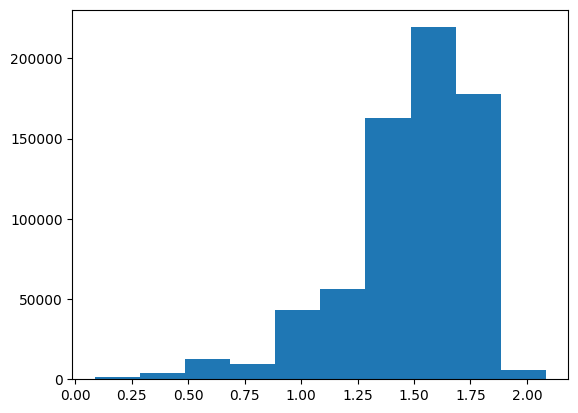

In [ ]:
# Graficar el histograma de la columna 'ESTU_PRGM_ACADEMICO' después de la transformación
plt.hist(transformed_data['ESTU_PRGM_ACADEMICO'])

(array([1.40180e+04, 0.00000e+00, 1.28364e+05, 3.67767e+05, 3.49700e+04,
        4.68500e+04, 2.93760e+04, 6.92260e+04, 1.88900e+03, 4.00000e+01]),
 array([1.23776573, 1.30132492, 1.3648841 , 1.42844329, 1.49200248,
        1.55556166, 1.61912085, 1.68268003, 1.74623922, 1.80979841,
        1.87335759]),
 <BarContainer object of 10 artists>)

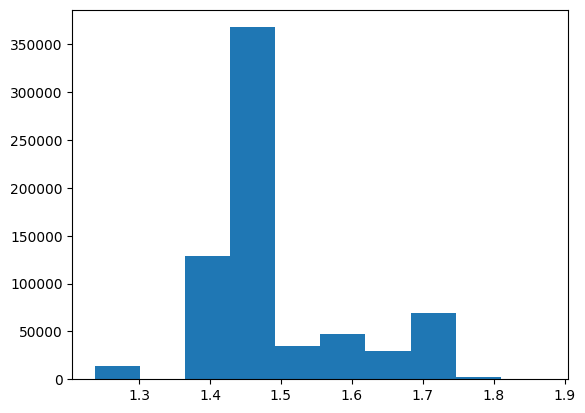

In [ ]:
# Graficar el histograma de la columna 'ESTU_PRGM_DEPARTAMENTO' después de la transformación
plt.hist(transformed_data['ESTU_PRGM_DEPARTAMENTO'])

##Reemplazo de Columnas con Datos Transformados
Este código actualiza las columnas originales de tu DataFrame df2 (ESTU_PRGM_DEPARTAMENTO y ESTU_PRGM_ACADEMICO) con los valores numéricos resultantes de la transformación aplicada previamente. Básicamente, estamos sustituyendo las categorías de texto por su representación codificada, la cual es más apta para los modelos de machine learning.

In [ ]:
# Reemplazar las columnas originales en df2 con los datos transformados
df2['ESTU_PRGM_DEPARTAMENTO'] = transformed_data['ESTU_PRGM_DEPARTAMENTO']
df2['ESTU_PRGM_ACADEMICO'] = transformed_data['ESTU_PRGM_ACADEMICO']
# Mostrar el DataFrame con las columnas actualizadas
df2

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,...,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,FAMI_ESTRATOVIVIENDA_Estrato 1,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_ESTRATOVIVIENDA_Sin Estrato
0,20212.0,1.662742,1.458950,1,1,1,0,0,1,1,...,False,False,False,False,False,True,False,False,False,False
1,20212.0,1.441590,1.481302,0,1,0,0,0,1,0,...,False,False,True,False,False,True,False,False,False,False
2,20203.0,1.741652,1.458950,1,1,0,0,0,0,1,...,False,False,False,False,False,True,False,False,False,False
3,20195.0,1.622211,1.404329,1,1,0,0,0,1,1,...,False,False,False,False,False,False,True,False,False,False
4,20212.0,1.543373,1.407370,1,1,1,0,0,1,1,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,20195.0,1.054874,1.575973,1,1,0,0,1,1,1,...,True,False,False,False,True,False,False,False,False,False
692496,20212.0,1.543373,1.710510,1,1,0,0,0,1,1,...,True,False,False,False,False,True,False,False,False,False
692497,20183.0,1.707842,1.458950,1,1,0,0,1,1,1,...,True,False,False,False,False,True,False,False,False,False
692498,20195.0,1.543373,1.595839,0,0,0,0,1,1,0,...,False,False,False,True,False,False,False,False,False,False


##Conteo de Valores Nulos
Vamos a contar los valores nulos en cada columna del DataFrame. Esto nos dará una idea rápida de cuántos datos faltan en cada una.

In [ ]:
# Contar el número de valores nulos en cada columna del DataFrame
df2.isna().sum()

,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
FAMI_TIENEINTERNET,0
FAMI_TIENELAVADORA,0
FAMI_TIENEAUTOMOVIL,0
ESTU_PRIVADO_LIBERTAD,0
ESTU_PAGOMATRICULAPROPIO,0
FAMI_TIENECOMPUTADOR,0
FAMI_TIENEINTERNET.1,0


#Dataset Preparado: Análisis de Correlación
Con la ausencia de valores nulos en todas las columnas, el dataset se encuentra ahora en un estado óptimo para futuras operaciones.

El siguiente paso es generar una matriz de correlación. Dado que nuestros datos son ahora completamente numéricos, podemos calcular de manera efectiva las relaciones lineales entre las variables. Este análisis es fundamental para comprender cómo los diversos factores cuantitativos influyen en la variable objetivo.

Es importante recordar que en una matriz de correlación:

* Un coeficiente cercano a 1 o -1 indica una correlación lineal fuerte.

* Un coeficiente próximo a 0 sugiere una correlación lineal débil o nula.

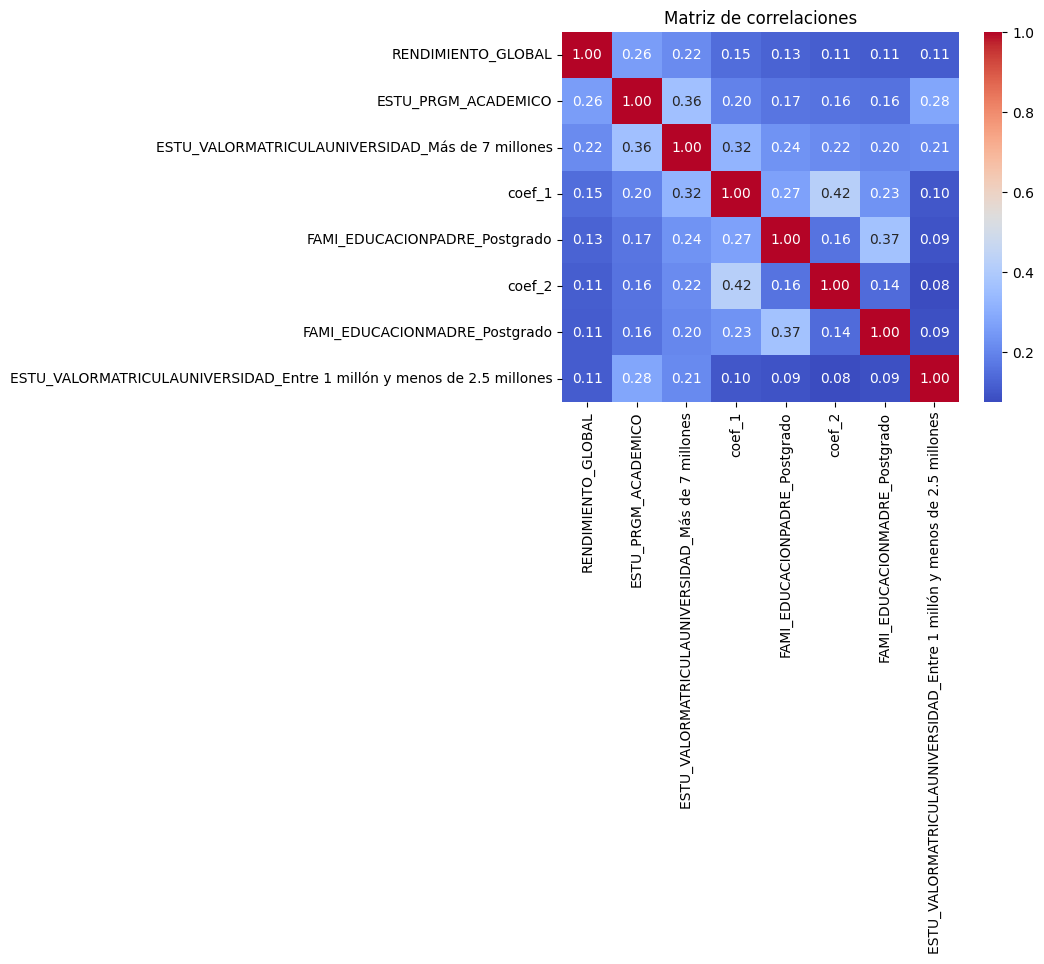

In [ ]:
# Calcular la matriz de correlación absoluta para las columnas numéricas
corr_matrix = np.abs(df2.corr(numeric_only=True))
# Seleccionar las 8 columnas con mayor correlación con 'RENDIMIENTO_GLOBAL'
top = corr_matrix['RENDIMIENTO_GLOBAL'].sort_values(ascending=False)[0:8].index
# Crear una sub-matriz de correlación con las columnas seleccionadas
corr_matrix = corr_matrix.loc[top, top]
# Graficar el heatmap de la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# Añadir título al gráfico
plt.title("Matriz de correlaciones")
# Mostrar el gráfico
plt.show()

In [ ]:
# Calcular la matriz de correlación absoluta para todas las columnas
corr_matrix = np.abs(df2.corr())
# Obtener las correlaciones de 'RENDIMIENTO_GLOBAL' ordenadas de forma descendente
corr_as_dec = corr_matrix['RENDIMIENTO_GLOBAL'].sort_values(ascending=False)
# Mostrar las correlaciones
corr_as_dec

,RENDIMIENTO_GLOBAL
RENDIMIENTO_GLOBAL,1.000000
ESTU_PRGM_ACADEMICO,0.257942
ESTU_VALORMATRICULAUNIVERSIDAD_Más de 7 millones,0.215324
coef_1,0.148498
FAMI_EDUCACIONPADRE_Postgrado,0.125027
coef_2,0.113738
FAMI_EDUCACIONMADRE_Postgrado,0.112512
ESTU_VALORMATRICULAUNIVERSIDAD_Entre 1 millón y menos de 2.5 millones,0.110025
ESTU_PAGOMATRICULAPROPIO,0.103880
coef_4,0.103214


##Observaciones Clave de la Correlación con la Variable Objetivo
Nuestro análisis de correlación revela que la variable 'PERIODO' mostró la correlación más baja con la variable objetivo. En contraste, el 'VALOR DE LA MATRICULA DE LA UNIVERSIDAD' fue la variable con la correlación más alta.

Esta última correlación es particularmente significativa y sugiere que un mayor valor en la matrícula universitaria podría estar asociado con mejores condiciones financieras. Estas mejores condiciones, a su vez, podrían traducirse en un entorno más favorable para el estudio, como mayor comodidad o la posibilidad de dedicarse exclusivamente a la academia.

A continuacion se importan las librerias necesarias

In [ ]:
# Importar librerías necesarias para modelado, evaluación y preprocesamiento
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve,train_test_split,cross_validate, ShuffleSplit,GridSearchCV
from sklearn.linear_model import LinearRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,average_precision_score,mean_absolute_error,r2_score,confusion_matrix,classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
import textwrap
from sklearn.decomposition import NMF,PCA
from itertools import product
from sklearn.metrics import f1_score,accuracy_score,recall_score
# Instalar la librería catboost
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.5 MB/s eta 0:00:00


In [ ]:
# Función para reportar el error del modelo usando validación cruzada (RMSLE)
def report_cv_score(z):

    # Calcular RMSE en prueba y entrenamiento
    lr_ts_score = z['test_score']*(-1)
    lr_tr_score = z['train_score']*(-1)
    lin_rmse_ts = np.sqrt(lr_ts_score)
    lin_rmse_tr = np.sqrt(lr_tr_score)
    # Imprimir los resultados promedio y desviación estándar del RMSLE
    print("RMSLE Test: ", "{:.5f}".format(np.mean(lin_rmse_ts)), "(±", "{:.8f}".format(np.std(lin_rmse_ts)),")")
    print("RMSLE Train: ", "{:.5f}".format(np.mean(lin_rmse_tr)), "(±", "{:.8f}".format(np.std(lin_rmse_tr)),")")

In [ ]:
# Función para calcular el RMSLE (Root Mean Squared Logarithmic Error)
def RMSLE(y_actual, y_pred):

    return np.sqrt(mean_squared_error(y_actual, y_pred))

In [ ]:
# Asignar el DataFrame preprocesado a la variable 'train'
train = df2

# Separar las features (X) y la variable objetivo (y)
X = train.drop(['RENDIMIENTO_GLOBAL'],axis = 1)
y = train['RENDIMIENTO_GLOBAL'].values

##Particionamiento de Datos para Modelado Predictivo
El siguiente segmento de código ilustra el proceso de subdivisión del conjunto de datos en particiones destinadas al entrenamiento, validación y evaluación de modelos predictivos. Este procedimiento es fundamental para garantizar la rigurosidad de la evaluación del modelo y su capacidad de generalización a datos no observados.

A continuación, se detalla la implementación:

In [ ]:
# Definir el tamaño del conjunto de prueba
test_size = 0.3
# Calcular el tamaño del conjunto de validación (relativo al tamaño del conjunto de entrenamiento)
val_size  = test_size/(1-test_size) # Elementos de validación

# Imprimir las dimensiones iniciales de X e y
print (X.shape, y.shape)
# Imprimir los tamaños de los conjuntos de prueba y validación
print ("test size %.2f"%test_size)
print ("val size is %.2f (relative to %.2f) "%(val_size, 1-test_size))

# Dividir los datos en conjuntos de entrenamiento y prueba
# Xtv, ytv son los datos que se usan para entrenar el modelo
# Xts, yts son los datos que se usan para probar el modelo (solo se usan para el testeo final de los modelos que se seleccionen)
Xtv, Xts, ytv, yts = train_test_split(X, y, test_size=test_size)
# Imprimir las dimensiones de los conjuntos de entrenamiento y prueba resultantes
print (Xtv.shape, Xts.shape)

(692500, 58) (692500,)
test size 0.30
val size is 0.43 (relative to 0.70) 
(484750, 58) (207750, 58)


#Continuando:
Para mejorar la precisión de nuestras predicciones, vamos a utilizar y comparar dos técnicas de modelado avanzadas basadas en boosting: Gradient Boosting y CatBoost.

Gradient Boosting: Este método crea un modelo potente al combinar varios modelos más simples (generalmente árboles de decisión) de forma secuencial. Cada modelo aprende de los errores del anterior, lo que lleva a predicciones más acertadas.

CatBoost: Es una versión de Gradient Boosting diseñada específicamente para trabajar de forma eficiente con datos categóricos. CatBoost agiliza el entrenamiento y a menudo ofrece mayor velocidad y precisión que otros métodos de Gradient Boosting.

In [ ]:
# Inicializar los modelos de clasificación: CatBoost y Gradient Boosting
# Modelo1 = DecisionTreeClassifier(max_depth=5)
from catboost import CatBoostClassifier
Modelo1 = CatBoostClassifier(iterations=1000,leaf_estimation_method="Newton")
Modelo2 = GradientBoostingClassifier(max_depth=5)

Utilizamos de nuevo la función para evaluar las metricas escogidas

In [ ]:
# Función para entrenar, probar y evaluar un modelo de clasificación
def train_test_evaluate(model_name, model, X_train, y_train, X_test, y_test):
    # Entrenar el modelo con los datos de entrenamiento
    model.fit(X_train, y_train)
    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular métricas de evaluación
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    F1= f1_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test,y_pred, average="weighted")

    # Crear un DataFrame con los resultados de las métricas
    result_df = pd.DataFrame(
        data=[[model_name, rmse, r2 , accuracy, F1 ,recall]],
        columns=["Model",'RMSE', 'R2 Score', "Accuracy", "F1 score", "Recall"]
    )
    return result_df

Obtenemos las metricas para el arbol de desición

In [ ]:
# Entrenar, probar y evaluar el modelo CatBoost
train_test_evaluate("CatBoost", Modelo1,Xtv,ytv,Xts,yts)

0:	learn: 1.3795520	total: 1.11s	remaining: 18m 29s
1:	learn: 1.3734693	total: 1.72s	remaining: 14m 16s
2:	learn: 1.3675397	total: 2.31s	remaining: 12m 46s
3:	learn: 1.3620560	total: 2.79s	remaining: 11m 33s
4:	learn: 1.3567862	total: 3.13s	remaining: 10m 22s
5:	learn: 1.3521009	total: 3.56s	remaining: 9m 49s
6:	learn: 1.3475594	total: 4.1s	remaining: 9m 42s
7:	learn: 1.3431316	total: 4.8s	remaining: 9m 54s
8:	learn: 1.3390662	total: 5.67s	remaining: 10m 24s
9:	learn: 1.3353641	total: 6.49s	remaining: 10m 42s
10:	learn: 1.3317385	total: 7.28s	remaining: 10m 54s
11:	learn: 1.3282143	total: 7.95s	remaining: 10m 54s
12:	learn: 1.3250316	total: 8.51s	remaining: 10m 45s
13:	learn: 1.3219423	total: 8.96s	remaining: 10m 30s
14:	learn: 1.3191028	total: 9.24s	remaining: 10m 7s
15:	learn: 1.3162271	total: 9.57s	remaining: 9m 48s
16:	learn: 1.3135169	total: 9.9s	remaining: 9m 32s
17:	learn: 1.3108525	total: 10.2s	remaining: 9m 18s
18:	learn: 1.3083572	total: 10.6s	remaining: 9m 6s
19:	learn: 1.30

,Model,RMSE,R2 Score,Accuracy,F1 score,Recall
0,CatBoost,1.361572,-0.477218,0.433208,0.419508,0.433208


In [ ]:
# Entrenar, probar y evaluar el modelo Gradient Boosting
train_test_evaluate("gradientboost",Modelo2,Xtv,ytv,Xts,yts)

,Model,RMSE,R2 Score,Accuracy,F1 score,Recall
0,gradientboost,1.368133,-0.49149,0.429454,0.417336,0.429454


In [ ]:
# Importar cross_val_score para realizar validación cruzada
from sklearn.model_selection import cross_val_score
import numpy as np

# Realizar validación cruzada con el modelo CatBoost usando neg_log_loss como métrica
scores = cross_val_score(Modelo1, X, y, cv=5, scoring='neg_log_loss')
# Convertir los scores a valores positivos (cross entropy)
cross_scores = -scores

# Imprimir el promedio de la cross entropy obtenida de la validación cruzada
print(f"Promedio cross entropy: {cross_scores.mean()}")

Se han truncado las últimas 5000 líneas del flujo de salida.
1:	learn: 1.3736771	total: 968ms	remaining: 8m 3s
2:	learn: 1.3676570	total: 1.43s	remaining: 7m 54s
3:	learn: 1.3622039	total: 2.09s	remaining: 8m 40s
4:	learn: 1.3568773	total: 3.09s	remaining: 10m 14s
5:	learn: 1.3521544	total: 4.59s	remaining: 12m 40s
6:	learn: 1.3475918	total: 5.75s	remaining: 13m 36s
7:	learn: 1.3431880	total: 7.08s	remaining: 14m 37s
8:	learn: 1.3391733	total: 8.21s	remaining: 15m 4s
9:	learn: 1.3352696	total: 9.21s	remaining: 15m 11s
10:	learn: 1.3316479	total: 10.2s	remaining: 15m 17s
11:	learn: 1.3281455	total: 11.2s	remaining: 15m 18s
12:	learn: 1.3249703	total: 11.9s	remaining: 15m
13:	learn: 1.3219676	total: 12.3s	remaining: 14m 26s
14:	learn: 1.3190432	total: 12.7s	remaining: 13m 52s
15:	learn: 1.3161390	total: 13.3s	remaining: 13m 35s
16:	learn: 1.3134983	total: 14s	remaining: 13m 27s
17:	learn: 1.3108472	total: 14.8s	remaining: 13m 28s
18:	learn: 1.3083488	total: 15.6s	remaining: 13m 26s
19:	l

PCA+CATBOOST

Se mejoran los hiperparametros en este caso para el mejor modelo que según las metricas escogidas fue el catboost

In [ ]:
# Importar CatBoostClassifier y módulos para búsqueda de hiperparámetros
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit

# Definir la cuadrícula de hiperparámetros para la búsqueda
parametros_catboost = {
    'iterations': [10, 20, 30],  # Número de iteraciones
    'learning_rate': [0.01, 0.05, 0.1],  # Tasa de aprendizaje
    'depth': [6, 8, 10],  # Profundidad del árbol
    'l2_leaf_reg': [1, 3, 5],  # Regularización L2
    'border_count': [32, 64, 128],  # Número de bordes
}

# Inicializar el modelo CatBoost con la función de pérdida MultiClass
catboost_model = CatBoostClassifier(loss_function='MultiClass', verbose=0)
# Configurar GridSearchCV para encontrar los mejores hiperparámetros
catboost_grid = GridSearchCV(
    estimator=catboost_model,
    param_grid=parametros_catboost,
    cv=ShuffleSplit(n_splits=2, test_size=0.2, random_state=42),
    scoring='f1_weighted', # Métrica de evaluación para la búsqueda
    verbose=1,
    n_jobs=-1 # Usar todos los núcleos disponibles
)

# Ajustar GridSearchCV a los datos de entrenamiento
catboost_grid.fit(Xtv, ytv)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores parámetros para CatBoost:", catboost_grid.best_params_)
# Inicializar el mejor modelo CatBoost con los hiperparámetros encontrados
best_catboost = CatBoostClassifier(
    iterations=catboost_grid.best_params_['iterations'],
    learning_rate=catboost_grid.best_params_['learning_rate'],
    depth=catboost_grid.best_params_['depth'],
    l2_leaf_reg=catboost_grid.best_params_['l2_leaf_reg'],
    border_count=catboost_grid.best_params_['border_count'],
    loss_function='MultiClass',  # Usamos 'MultiClass' para clasificación multiclase
    custom_metric=['AUC'],  # Ahora lo agregamos al modelo final
    verbose=0  # Evitar la salida verbose del modelo
)

# Entrenar el mejor modelo CatBoost con los datos de entrenamiento
best_catboost.fit(Xtv, ytv)
# Evaluar el mejor modelo CatBoost en los conjuntos de entrenamiento y prueba
df1 = train_test_evaluate("Mejor CatBoost", best_catboost, Xtv, ytv, Xts, yts)

# Imprimir el DataFrame con los resultados de la evaluación
print(df1)

Fitting 2 folds for each of 243 candidates, totalling 486 fits
Mejores parámetros para CatBoost: {'border_count': 64, 'depth': 10, 'iterations': 30, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
            Model      RMSE  R2 Score  Accuracy  F1 score    Recall
0  Mejor CatBoost  1.378562 -0.514315  0.419783  0.402581  0.419783


Como se observó anteriormente, con los hiperparametros evaluados no mejoró el accuracy, por tanto el modelo solucion final será el inicial

Prueba con el CSV.

In [ ]:
# Cargar el archivo de datos de prueba
test = pd.read_csv('test.csv')
# Mostrar las primeras filas del DataFrame de prueba
test.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,coef_4
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa,0.328,0.219,0.317,0.247
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,0.227,0.283,0.296,0.324
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.285,0.228,0.294,0.247
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta,0.160,0.408,0.217,0.294
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.209,0.283,0.306,0.286


Se define además una funcion que haga tood el procesamiento de los datos de la misma forma que para train
para así poder aplicarla a los datos test y obtener una predicción coherente

In [ ]:
# Definir una función para preprocesar los datos de prueba
def pre_pripeline(df2, preprocess_pipeline, encoders):
    # Convertir la columna 'PERIODO' a tipo flotante
    df2['PERIODO'] = df2['PERIODO'].astype(float)
    # Aplicar One-Hot Encoding a las columnas categóricas especificadas
    columns_to_expand = ['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',"FAMI_EDUCACIONPADRE","FAMI_EDUCACIONMADRE","FAMI_ESTRATOVIVIENDA"]
    df2 = pd.get_dummies(df2, columns=columns_to_expand)
    # Eliminar la columna 'ID'
    df2 = df2.drop(['ID',], axis=1)

    # Definir las columnas categóricas a codificar con Label Encoding
    categorical_columns = ['FAMI_TIENEINTERNET', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET.1']

    # Aplicar Label Encoding a las columnas categóricas
    for col in categorical_columns:
        # Obtener el encoder ajustado desde el diccionario
        label_encoder = encoders[col]
        # Llenar valores faltantes con 'Unknown' antes de transformar
        df2[col] = df2[col].fillna('Unknown') # Fill NaN with 'Unknown' before transforming
        # Asegurarse de que 'Unknown' esté en las clases del encoder si no lo estaba en el entrenamiento
        if 'Unknown' not in label_encoder.classes_:
            label_encoder.classes_ = np.append(label_encoder.classes_, 'Unknown')
        # Transformar la columna usando el encoder ajustado
        df2[col] = label_encoder.transform(df2[col])

    # Seleccionar las columnas para aplicar Target Encoding
    X = df2[['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO']]

    # Transformar las columnas seleccionadas usando el pipeline de preprocesamiento
    transformed_data = preprocess_pipeline.transform(X)
    # Reemplazar las columnas originales con los datos transformados
    df2['ESTU_PRGM_DEPARTAMENTO'] = transformed_data['ESTU_PRGM_DEPARTAMENTO']
    df2['ESTU_PRGM_ACADEMICO'] = transformed_data['ESTU_PRGM_ACADEMICO']

    # Devolver el DataFrame preprocesado
    return df2

In [ ]:
# Aplicar la función de preprocesamiento a los datos de prueba
test_pre = pre_pripeline(test, preprocess_pipeline, encoders)

Realizamos las predicciones y se revisa que todo esté bien

In [ ]:
# Realizar predicciones en los datos de prueba utilizando el modelo CatBoost entrenado
predicciones = Modelo1.predict(test_pre)

In [ ]:
# Mostrar las predicciones obtenidas
predicciones

array([[1],
       [2],
       [0],
       ...,
       [2],
       [0],
       [0]])

In [ ]:
# Invertir la codificación de las predicciones para obtener las etiquetas originales
true_preds = encoders["RENDIMIENTO_GLOBAL"].inverse_transform(predicciones)
# Crear un DataFrame con los IDs de los datos de prueba
solve = pd.DataFrame(test["ID"])
# Añadir la columna de predicciones decodificadas al DataFrame
solve["RENDIMIENTO_GLOBAL"] = true_preds
# Mostrar el DataFrame resultante con IDs y predicciones
solve

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,ID,RENDIMIENTO_GLOBAL
0,550236,bajo
1,98545,medio-alto
2,499179,alto
3,782980,bajo
4,785185,bajo
...,...,...
296781,496981,bajo
296782,209415,alto
296783,239074,medio-alto
296784,963852,alto


Se toman solo los ID con su respectivas predicciones

In [ ]:
# Crear un DataFrame con los IDs de los datos de prueba
solve = pd.DataFrame(test["ID"])
# Añadir la columna de predicciones decodificadas al DataFrame
solve['RENDIMIENTO_GLOBAL'] = true_preds
# Mostrar el DataFrame resultante con IDs y predicciones
solve

,ID,RENDIMIENTO_GLOBAL
0,550236,bajo
1,98545,medio-alto
2,499179,alto
3,782980,bajo
4,785185,bajo
...,...,...
296781,496981,bajo
296782,209415,alto
296783,239074,medio-alto
296784,963852,alto


Y se guardan en un archivo csv

In [ ]:
# Guardar el DataFrame 'solve' en un archivo CSV sin incluir el índice
solve.to_csv('./SolucionPrueba.csv', index=False)

In [ ]:
# Cargar el archivo CSV 'Solucion.csv' en un DataFrame
df = pd.read_csv('Solucion.csv')